# Зачетная работа 
*Коробейников А.П.* 

##  Численное интегрирование. Светимость черного тела

1.Построить для Солнца график зависимости 𝜑(𝜆,𝑇) от 𝜆.

2.Вычислить светимость Солнца на видимой области длин волн.

3.Вычислить светимость Солнца для всех длин волн.

4.Найти светимость Солнца с помощью закона Стефана - Больцмана.

5.Найти солнечную постоянную.

6.Результаты сравнить с данными из литературы.

7.Сделать выводы.

## 1 График

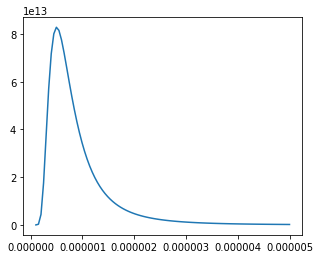

In [460]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
plt.figure(figsize = (5,4))
T = 5778
c = 2.9979*10**8
h = 6.6261*10**-34
k = 1.3806*10**-23
x = np.linspace(1*10**-7,50*10**-7,100)
y = (2*np.pi*h*c**2)/(x**5*(np.e**((h*c)/(x*k*T)) - 1))
plt.plot (x,y)
pass

## 2 Светимость Солнца на видимой области длин волн

In [471]:
a = 3.5 * (10**(-7))
b = 7 * (10**(-7))
n = 100
hh = (b - a)/n
x = np.arange(a + hh/2, b, hh)
y = (2*np.pi*h*c**2)/((x**5)*((np.e**((h*c)/(x*k*T))-1)))
I_rect = hh*sum(y)
I_rect

26456374.429090716

In [472]:
I_trapz = integrate.trapz(y, x)
I_trapz

26239134.004388973

In [487]:
I_simps = integrate.simps(y, x)
print(I_simps)

26239611.853874616


In [503]:
Rs = 6.957 * 10**8  #Радиус Солнца
Lv = I_simps * 4 * np.pi * Rs**2 #умножим найденный интеграл на площадь поверхности Солнца и получим результат
Lv #светимость Солнца на видимой области длин волн (Вт)

1.595920587666389e+26

## 3 Светимость Солнца для всех длин волн через несобственный интеграл

In [507]:
import scipy
def integrand (x):
  return (2*np.pi*h*c**2)/(x**5*(np.e**((h*c)/(x*k*T)) - 1))

_R, abserr = scipy.integrate.quad(integrand, 0, np.inf)
_R 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  """


62936791.375977986

In [508]:
ans = _R * 4 * np.pi * Rs**2
ans #светимость Солнца для всех длин волн

3.8278813588378646e+26

## 4 Закон Стефана-Больцмана

Найдем светимость Солнца с помощью закона *Стефана–Больцмана*

In [505]:
Rs = 6.957 * 10**8  #Радиус Солнца
const_st_b = 2*(np.pi**5)*(k**4)/(15*(c**2)*(h**3)) #постоянная Стефана-Больцмана (Вт/(м^2 * K^4))
R = const_st_b * T**4 #(Вт/м^2) 
L = R*4*np.pi*Rs**2  #(Вт)
L

3.843397958410175e+26

## 5 Солнечная постоянная

Считая Солнце чёрным телом, оценим энергию, приходящую от него на единичную площадку в окрестности Земли.
Расстояние r между Землёй и Солнцем примем равным :

In [481]:
r = 149.6 * 10**9  #(м)

Разделив светимость Солнца на площадь сферы радиуса r, получим так называемую солнечную постоянную,
то есть, поток всего излучения, падающий вне атмосферы Земли на площадку единичной площади при среднем 
расстоянии Земли от Солнца:

In [501]:
E = L/(4*np.pi*r**2) #(Вт/м^2)
E

1366.6027931665326

## 6 Результаты


Данные из википедии: Солнечная светимость L = 3.827 * 10^26 (Вт); Солнечная постоянная E = 1367 (Вт/м^2).

Результаты полученные в ходе работы:

1.Светимость Солнца найденная с помощью закона Стефана-Больцмана: 3.843 * 10^26 (Вт).

2.Светимость Солнца найденная с помощью несобстевнного интеграла: 3.827 * 10^26 (Вт).

3.Светимость солнца на видимой области длин волн: 1.595 * 10^26 (Вт).

4.Солнечная постоянная: 1366.602 (Вт/м^2).

## 7 Выводы

1.С учетом погрешности вычисленные результаты совпадают с результатами из литературы.

2.Вычисленния с помощью несобственного интеграла дали более точный результат.

3.Метод трапеций и метод Симпсона более точно вычисляют определенный интеграл.